In [1]:
!git clone https://github.com/aliaksandr960/segment-anything-eo.git

# !pip install rasterio
# !pip install geopandas


!wget https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth
!wget https://dl.fbaipublicfiles.com/segment_anything/sam_vit_l_0b3195.pth
!wget https://dl.fbaipublicfiles.com/segment_anything/sam_vit_b_01ec64.pth

Cloning into 'segment-anything-eo'...
remote: Enumerating objects: 180, done.
remote: Counting objects: 100% (180/180), done.
remote: Compressing objects: 100% (143/143), done.
remote: Total 180 (delta 43), reused 133 (delta 13), pack-reused 0
Receiving objects: 100% (180/180), 27.95 MiB | 24.87 MiB/s, done.
Resolving deltas: 100% (43/43), done.
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 15.3 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 25.1 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 41.7 MB/s eta 0:00:0000:0100:01
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
--2023-05-23 09:48:14--  https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth
Resolving dl.fbaipublicfi

In [1]:
USER = 'spiruel'

import os
os.chdir(f'/home/{USER}/ESRIN-pixel-pioneers/segment-anything-eo')
#import cv2

In [2]:
import stackstac

In [3]:
import matplotlib.pyplot as plt
from sameo import SamEO

In [4]:
# !mv ../sam_vit* /home/spiruel/ESRIN-pixel-pioneers/segment-anything-eo

In [5]:
# Availble SamEO arguments:
# checkpoint="sam_vit_h_4b8939.pth",
# model_type='vit_h',
# device='cpu',
# erosion_kernel=(3, 3),
# mask_multiplier=255,
# sam_kwargs=None

# Availble sam_kwargs:
# points_per_side: Optional[int] = 32,
# points_per_batch: int = 64,
# pred_iou_thresh: float = 0.88,
# stability_score_thresh: float = 0.95,
# stability_score_offset: float = 1.0,
# box_nms_thresh: float = 0.7,
# crop_n_layers: int = 0,
# crop_nms_thresh: float = 0.7,
# crop_overlap_ratio: float = 512 / 1500,
# crop_n_points_downscale_factor: int = 1,
# point_grids: Optional[List[np.ndarray]] = None,
# min_mask_region_area: int = 0,
# output_mode: str = "binary_mask",

device = 'cuda:0'

sam_eo = SamEO(checkpoint="sam_vit_h_4b8939.pth",
               model_type='vit_h',
               device=device,
               erosion_kernel=(3, 3),
               mask_multiplier=255,
               sam_kwargs=None)

In [6]:
!nvidia-smi

Thu May 25 13:08:47 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.161.03   Driver Version: 470.161.03   CUDA Version: 11.7     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            On   | 00000000:00:1E.0 Off |                    0 |
| N/A   51C    P0    36W /  70W |   2694MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [7]:
lon, lat = -93.18910568884452, 42.26592707690072 #-1.1330547635665225, 52.492388262661116 #-86.11336637425283, 40.91742389473447

In [8]:
import pystac_client
URL = "https://earth-search.aws.element84.com/v0"
catalog = pystac_client.Client.open(URL)

In [9]:
import shapely
#shapely.Polygon(iowa_poly_coords)

In [10]:
%%time

iowa_poly_coords = [
      [
        -96.63948406847706,
        40.37543881253006
      ],
      [
        -90.14005889983169,
        40.37543881253006
      ],
      [
        -90.14005889983169,
        43.501197343651384
      ],
      [
        -96.63948406847706,
        43.501197343651384
      ],
      [
        -96.63948406847706,
        40.37543881253006
      ]
  ]
#iowa_poly = dict(type="Polygon", coordinates=iowa_poly_coords),

items = catalog.search(
    intersects=shapely.Polygon(iowa_poly_coords),#dict(type="Point", coordinates=[lon, lat]),
    collections=["sentinel-s2-l2a-cogs"],
    datetime="2018-06-01/2018-07-01"
).get_all_items()
len(items)

CPU times: user 435 ms, sys: 41.6 ms, total: 477 ms
Wall time: 5.36 s


397

In [11]:
%time stack = stackstac.stack(items, epsg=32615, resolution=20)

CPU times: user 361 ms, sys: 8.62 ms, total: 370 ms
Wall time: 374 ms


/home/conda/deepesdl15/a7157da0fccdce5409e44673b69f8e7ce5f196c82aea26b6ab27bdaa1edacc90-20230524-102607-328015-192-pixel-pioneers/lib/python3.8/site-packages/stackstac/prepare.py:363: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  times = pd.to_datetime(


In [12]:
stack

<xarray.DataArray 'stackstac-2b5b1e3be452d608357e451742d9328b' (time: 397,
                                                                band: 17,
                                                                y: 26177,
                                                                x: 36975)>
dask.array<fetch_raster_window, shape=(397, 17, 26177, 36975), dtype=float64, chunksize=(1, 1, 1024, 1024), chunktype=numpy.ndarray>
Coordinates: (12/27)
  * time                        (time) datetime64[ns] 2018-06-01T17:01:39 ......
    id                          (time) <U24 'S2A_15TXG_20180601_0_L2A' ... 'S...
  * band                        (band) <U8 'overview' 'B11' ... 'visual' 'SCL'
  * x                           (x) float64 8.518e+04 8.52e+04 ... 8.247e+05
  * y                           (y) float64 4.91e+06 4.91e+06 ... 4.387e+06
    gsd                         (band) object 10 20 60 20 10 ... 60 None 10 None
    ...                          ...
    updated                     (time) <U24 '2020-09-08T08:39:34.792Z' ... '2...
    title                       (band) <U31 'True color image' ... 'Scene Cla...
    common_name                 (band) object None 'swir16' ... None None
    center_wavelength           (band) object None 1.6137 0.4439 ... None None
    full_width_half_max         (band) object None 0.143 0.027 ... None None
    epsg                        int64 32615
Attributes:
    spec:        RasterSpec(epsg=32615, bounds=(85180, 4386700, 824680, 49102...
    crs:         epsg:32615
    transform:   | 20.00, 0.00, 85180.00|\n| 0.00,-20.00, 4910240.00|\n| 0.00...
    resolution:  20

In [17]:
lowcloud = stack[stack["eo:cloud_cover"] < 20]
nir, red = lowcloud.sel(band="B08"), lowcloud.sel(band="B04")
ndvi = (nir - red) / (nir + red)
ndvi = ndvi.median("time", keep_attrs=True)

In [13]:
lowcloud = stack[stack["eo:cloud_cover"] < 20]
rgb = lowcloud.sel(band=["B04", "B03", "B02"])
monthly = rgb.median("time", keep_attrs=True) #.resample(time="MS").median("time", keep_attrs=True)

In [14]:
monthly

<xarray.DataArray 'stackstac-2b5b1e3be452d608357e451742d9328b' (band: 3,
                                                                y: 26177,
                                                                x: 36975)>
dask.array<nanmedian, shape=(3, 26177, 36975), dtype=float64, chunksize=(1, 291, 291), chunktype=numpy.ndarray>
Coordinates: (12/13)
  * band                    (band) <U8 'B04' 'B03' 'B02'
  * x                       (x) float64 8.518e+04 8.52e+04 ... 8.247e+05
  * y                       (y) float64 4.91e+06 4.91e+06 ... 4.387e+06
    gsd                     (band) object 10 10 10
    sentinel:latitude_band  <U1 'T'
    instruments             <U3 'msi'
    ...                      ...
    view:off_nadir          int64 0
    title                   (band) <U31 'Band 4 (red)' ... 'Band 2 (blue)'
    common_name             (band) object 'red' 'green' 'blue'
    center_wavelength       (band) object 0.6645 0.56 0.4966
    full_width_half_max     (band) object 0.038 0.045 0.098
    epsg                    int64 32615
Attributes:
    spec:        RasterSpec(epsg=32615, bounds=(85180, 4386700, 824680, 49102...
    crs:         epsg:32615
    transform:   | 20.00, 0.00, 85180.00|\n| 0.00,-20.00, 4910240.00|\n| 0.00...
    resolution:  20

In [28]:
import pyproj
x_utm, y_utm = pyproj.Proj(monthly.crs)(lon, lat)
buffer = 50000  # meters

In [31]:
aoi = monthly.loc[..., y_utm+buffer:y_utm-buffer, x_utm-buffer:x_utm+buffer]
aoi

<xarray.DataArray 'stackstac-2b5b1e3be452d608357e451742d9328b' (band: 3,
                                                                y: 5000, x: 5000)>
dask.array<getitem, shape=(3, 5000, 5000), dtype=float64, chunksize=(1, 291, 291), chunktype=numpy.ndarray>
Coordinates: (12/13)
  * band                    (band) <U8 'B04' 'B03' 'B02'
  * x                       (x) float64 4.344e+05 4.344e+05 ... 5.344e+05
  * y                       (y) float64 4.729e+06 4.729e+06 ... 4.629e+06
    gsd                     (band) object 10 10 10
    sentinel:latitude_band  <U1 'T'
    instruments             <U3 'msi'
    ...                      ...
    view:off_nadir          int64 0
    title                   (band) <U31 'Band 4 (red)' ... 'Band 2 (blue)'
    common_name             (band) object 'red' 'green' 'blue'
    center_wavelength       (band) object 0.6645 0.56 0.4966
    full_width_half_max     (band) object 0.038 0.045 0.098
    epsg                    int64 32615
Attributes:
    spec:        RasterSpec(epsg=32615, bounds=(85180, 4386700, 824680, 49102...
    crs:         epsg:32615
    transform:   | 20.00, 0.00, 85180.00|\n| 0.00,-20.00, 4910240.00|\n| 0.00...
    resolution:  20

In [17]:
import dask.diagnostics
with dask.diagnostics.ProgressBar():
    data = aoi.compute()

[########################################] | 100% Completed | 32.21 s


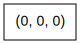

In [34]:
import dask.array as da

da.array(data).visualize(filename='transpose.svg')

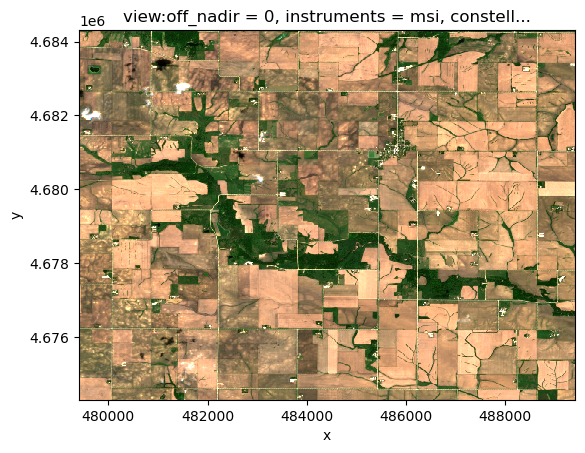

In [18]:
(data/2000).clip(0,1).plot.imshow()

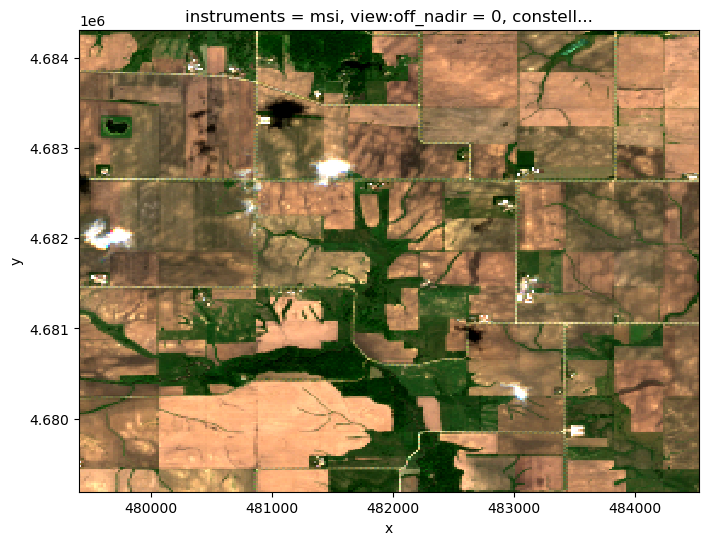

In [21]:
data[...,:256, :256].plot.imshow(rgb="band", robust=True, size=6);

In [18]:
def calculate_sample_grid(raster_h, raster_w, sample_h, sample_w, bound):

    h, w = sample_h, sample_w
    blocks = []
    height = h + 2 * bound
    width = w + 2 * bound

    for y in range(- bound, raster_h, h):
        for x in range(- bound, raster_w, w):

            rigth_x_bound = max(bound,
                                x + width - raster_w)
            bottom_y_bound = max(bound,
                                y + height - raster_h)

            blocks.append({'x': x,
                           'y': y,
                           'height': height,
                           'width': width,
                           'bounds':
                               [[bound, bottom_y_bound], [bound, rigth_x_bound]],
                           })
    return blocks

nbands, rh, rw = aoi.shape
sample_size = (512, 512)
sh, sw = sample_size
bound = 128

sample_grid = calculate_sample_grid(raster_h=rh, raster_w=rw, sample_h=sh, sample_w=sw, bound=bound)

In [19]:
len(sample_grid)

4

In [20]:
aoi.shape

(3, 500, 500)

NameError: name 'masked' is not defined

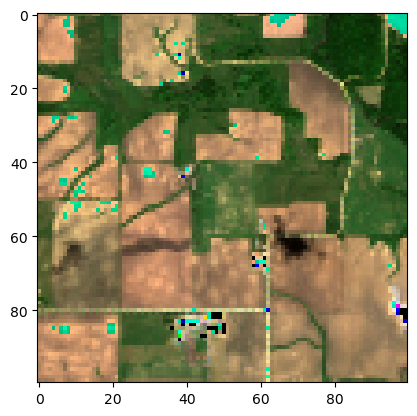

In [23]:
!pip install matplotlib --quiet
import matplotlib.pyplot as plt
import numpy as np
plt.imshow(((data[:3,100:200,100:200].to_numpy().T/2000).clip(0,1)*256).astype(np.uint8))
plt.imshow(masked[100:200,100:200])

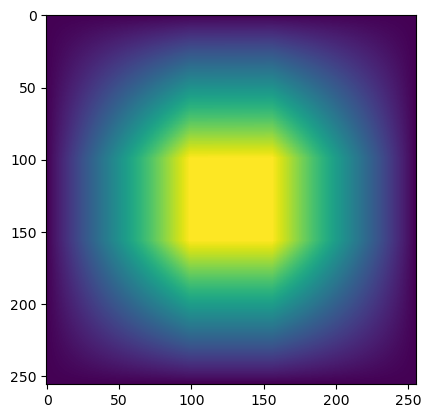

In [21]:
from typing import List, Optional, Tuple, Union

import numpy as np
def get_weights(shape: Tuple[int, int], buffer: Tuple[int, int], low: float = 0, high: float = 1) -> np.ndarray:
    """ Create weights array

    Function to create a numpy array of dimension, that outputs a linear gradient from low to high from the edges
    to the 2*buffer, and 1 elsewhere.
    """
    weight = np.ones(shape)
    weight[..., :2 * buffer[0]] = np.tile(np.linspace(low, high, 2 * buffer[0]), shape[0]).reshape(
        (shape[0], 2 * buffer[0]))
    weight[..., -2 * buffer[0]:] = np.tile(np.linspace(high, low, 2 * buffer[0]), shape[0]).reshape(
        (shape[0], 2 * buffer[0]))
    weight[:2 * buffer[1], ...] = weight[:2 * buffer[1], ...] * np.repeat(np.linspace(low, high, shape[1]),
                                                                          2 * buffer[1]).reshape(
        (2 * buffer[1], shape[1]))
    weight[-2 * buffer[1]:, ...] = weight[-2 * buffer[1]:, ...] * np.repeat(np.linspace(high, low, 2 * buffer[1]),
                                                                            shape[1]).reshape(
        (2 * buffer[1], shape[1]))
    return weight.astype(np.float32)

plt.imshow( get_weights(shape=(256,256), buffer=(50,50)))

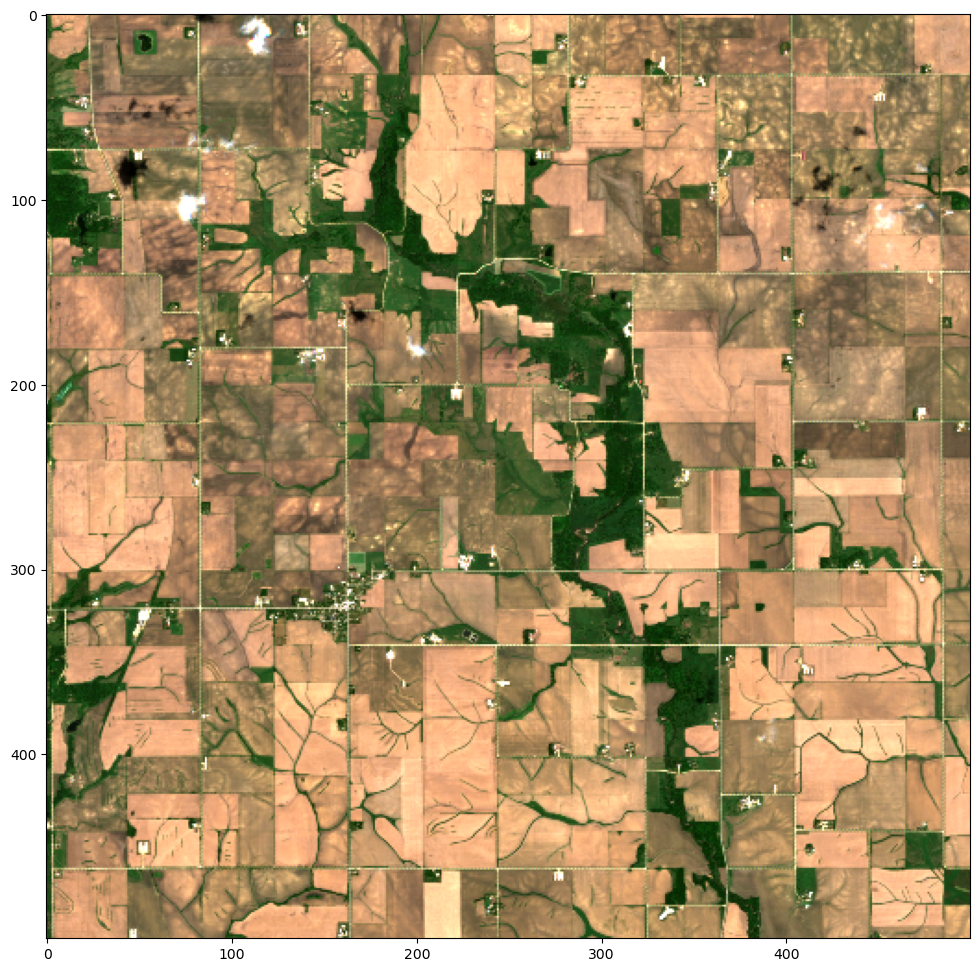

In [24]:
import numpy as np

#chunk size, row num, col num
cs = 512
rn = 0
cn = 0

channels, width, height = data.shape
#assert cs*rn+cs <= width
#assert cs*cn+cs <= height

pred = sam_eo((((data[:3,cs*rn:cs*rn+cs,cs*cn:cs*cn+cs].to_numpy().T/2000).clip(0,1))*256).astype(np.uint8))
masked = np.ma.masked_where(pred == 0, pred)

plt.figure(figsize=(12,12))
plt.imshow(((data[:3,cs*rn:cs*rn+cs,cs*cn:cs*cn+cs].to_numpy().T/2000).clip(0,1)*256).astype(np.uint8))
plt.imshow(masked, alpha=.75)

In [ ]:
aoi[:3,cs*rn:cs*rn+cs,cs*cn:cs*cn+cs]#.transform

In [ ]:
!rm -rf predictions/*

In [4]:
import glob, os
os.chdir('segment-anything-eo/predictions')
files = glob.glob('*.tif')
files_str = ' '.join(files)
!gdal_merge.py -o ../merged.tif $files_str
os.chdir('segment-anything-eo')

0...10...20...30...40...50...60...70...80...90...100 - done.


FileNotFoundError: [Errno 2] No such file or directory: '/content/segment-anything-eo'

In [ ]:
files_str

In [27]:
os.makedirs('predictions')

FileExistsError: [Errno 17] File exists: 'predictions'

In [ ]:
import xarray as xr
import numpy as np
import rasterio
from rasterio.transform import from_bounds
from tqdm import tqdm

# Get the shape of the xarray
channels, width, height = aoi.shape
# Define chunk size, row tot, and column tot
cs = 256
rn = width//cs
cn = height//cs

# Define the prediction function
def predict(chunk):
    # Perform prediction on the chunk, e.g. using sam_eo
    pred = sam_eo((((chunk[:3,:,:].to_numpy().T/2000).clip(0,1))*256).astype(np.uint8))
    return pred

# Iterate through each window
for r in tqdm(range(2*rn)):
    for c in tqdm(range(2*cn)):

        # Assert that the chunks fit within the xarray shape
        #assert 2*cs*r+cs <= width
        #assert 2*cs*c+cs <= height

        # Get the window bounds
        left = c * cs//2
        bottom = r * cs//2
        right = left + cs
        top = bottom + cs

        # Get the chunk for the current window
        import dask.diagnostics
        with dask.diagnostics.ProgressBar():
            chunk = aoi[:, bottom:top, left:right].compute()

        # Apply the prediction function to the chunk
        pred = predict(chunk)

        bbox = [float(min(chunk.x)), float(min(chunk.y)), float(max(chunk.x)), float(max(chunk.y))] #lower left, upper right
        transform = rasterio.transform.from_bounds(*bbox, width=cs, height=cs)


        # Save the prediction as a geotiff
        with rasterio.open('predictions/prediction_r{}_c{}_overlap.tif'.format(r, c), 'w', driver='GTiff', 
                           width=cs, height=cs, count=1, dtype=pred.dtype, transform=transform, crs=rasterio.crs.CRS({"init": f"epsg:{chunk.spec.epsg}"})) as dst:
            dst.write(pred.T, 1)
        print('saved', 'predictions/prediction_r{}_c{}_overlap.tif'.format(r, c))

  0%|          | 0/38 [00:00<?, ?it/s]

[########################################] | 100% Completed | 24.15 s



  3%|▎         | 1/38 [00:42<26:20, 42.73s/it]

saved predictions/prediction_r0_c0_overlap.tif
[########################################] | 100% Completed | 18.82 s



  5%|▌         | 2/38 [01:19<23:41, 39.50s/it]

saved predictions/prediction_r0_c1_overlap.tif
[########################################] | 100% Completed | 18.04 s



  8%|▊         | 3/38 [01:56<22:11, 38.05s/it]

saved predictions/prediction_r0_c2_overlap.tif
[########################################] | 100% Completed | 17.72 s



 11%|█         | 4/38 [02:32<21:07, 37.28s/it]

saved predictions/prediction_r0_c3_overlap.tif
[########################################] | 100% Completed | 17.11 s



 13%|█▎        | 5/38 [03:07<20:08, 36.62s/it]

saved predictions/prediction_r0_c4_overlap.tif
[########################################] | 100% Completed | 28.97 s



 16%|█▌        | 6/38 [03:55<21:31, 40.35s/it]

saved predictions/prediction_r0_c5_overlap.tif
[########################################] | 100% Completed | 30.19 s



 18%|█▊        | 7/38 [04:44<22:17, 43.15s/it]

saved predictions/prediction_r0_c6_overlap.tif
[########################################] | 100% Completed | 29.24 s



 21%|██        | 8/38 [05:32<22:19, 44.66s/it]

saved predictions/prediction_r0_c7_overlap.tif
[########################################] | 100% Completed | 28.67 s



 24%|██▎       | 9/38 [06:19<21:57, 45.43s/it]

saved predictions/prediction_r0_c8_overlap.tif
[########################################] | 100% Completed | 29.09 s



 26%|██▋       | 10/38 [07:07<21:31, 46.12s/it]

saved predictions/prediction_r0_c9_overlap.tif
[########################################] | 100% Completed | 19.64 s



 29%|██▉       | 11/38 [07:44<19:37, 43.62s/it]

saved predictions/prediction_r0_c10_overlap.tif
[########################################] | 100% Completed | 16.91 s



 32%|███▏      | 12/38 [08:20<17:47, 41.06s/it]

saved predictions/prediction_r0_c11_overlap.tif
[########################################] | 100% Completed | 27.15 s



 34%|███▍      | 13/38 [09:05<17:41, 42.44s/it]

saved predictions/prediction_r0_c12_overlap.tif
[########################################] | 100% Completed | 26.07 s



 37%|███▋      | 14/38 [09:50<17:15, 43.16s/it]

saved predictions/prediction_r0_c13_overlap.tif
[########################################] | 100% Completed | 27.76 s



 39%|███▉      | 15/38 [10:37<16:56, 44.18s/it]

saved predictions/prediction_r0_c14_overlap.tif
[########################################] | 100% Completed | 26.96 s



 42%|████▏     | 16/38 [11:22<16:22, 44.68s/it]

saved predictions/prediction_r0_c15_overlap.tif
[########################################] | 100% Completed | 13.87 s



 45%|████▍     | 17/38 [11:55<14:22, 41.06s/it]

saved predictions/prediction_r0_c16_overlap.tif
[########################################] | 100% Completed | 14.33 s



 47%|████▋     | 18/38 [12:28<12:53, 38.68s/it]

saved predictions/prediction_r0_c17_overlap.tif
[########################################] | 100% Completed | 16.53 s



 50%|█████     | 19/38 [13:04<11:55, 37.64s/it]

saved predictions/prediction_r0_c18_overlap.tif
[########################################] | 100% Completed | 14.28 s



 53%|█████▎    | 20/38 [13:36<10:52, 36.24s/it]

saved predictions/prediction_r0_c19_overlap.tif
[########################################] | 100% Completed | 13.98 s



 55%|█████▌    | 21/38 [14:09<09:56, 35.08s/it]

saved predictions/prediction_r0_c20_overlap.tif
[########################################] | 100% Completed | 44.40 s



 58%|█████▊    | 22/38 [15:12<11:35, 43.47s/it]

saved predictions/prediction_r0_c21_overlap.tif
[########################################] | 100% Completed | 36.65 s



 61%|██████    | 23/38 [16:07<11:45, 47.05s/it]

saved predictions/prediction_r0_c22_overlap.tif
[########################################] | 100% Completed | 36.14 s



 63%|██████▎   | 24/38 [17:02<11:31, 49.36s/it]

saved predictions/prediction_r0_c23_overlap.tif
[########################################] | 100% Completed | 35.53 s



 66%|██████▌   | 25/38 [17:56<11:00, 50.81s/it]

saved predictions/prediction_r0_c24_overlap.tif
[########################################] | 100% Completed | 24.78 s



 68%|██████▊   | 26/38 [18:39<09:41, 48.45s/it]

saved predictions/prediction_r0_c25_overlap.tif
[########################################] | 100% Completed | 25.90 s



 71%|███████   | 27/38 [19:23<08:38, 47.14s/it]

saved predictions/prediction_r0_c26_overlap.tif
[########################################] | 100% Completed | 25.30 s



 74%|███████▎  | 28/38 [20:07<07:41, 46.10s/it]

saved predictions/prediction_r0_c27_overlap.tif
[########################################] | 100% Completed | 42.99 s



 76%|███████▋  | 29/38 [21:08<07:36, 50.69s/it]

saved predictions/prediction_r0_c28_overlap.tif
[########################################] | 100% Completed | 42.14 s



 79%|███████▉  | 30/38 [22:09<07:09, 53.66s/it]

saved predictions/prediction_r0_c29_overlap.tif
[########################################] | 100% Completed | 43.74 s



 82%|████████▏ | 31/38 [23:11<06:33, 56.22s/it]

saved predictions/prediction_r0_c30_overlap.tif
[########################################] | 100% Completed | 41.80 s



 84%|████████▍ | 32/38 [24:11<05:44, 57.45s/it]

saved predictions/prediction_r0_c31_overlap.tif
[########################################] | 100% Completed | 23.76 s



 87%|████████▋ | 33/38 [24:54<04:24, 52.86s/it]

saved predictions/prediction_r0_c32_overlap.tif
[########################################] | 100% Completed | 20.17 s



 89%|████████▉ | 34/38 [25:32<03:13, 48.50s/it]

saved predictions/prediction_r0_c33_overlap.tif
[########################################] | 100% Completed | 20.16 s



 92%|█████████▏| 35/38 [26:10<02:16, 45.50s/it]

saved predictions/prediction_r0_c34_overlap.tif
[########################################] | 100% Completed | 19.95 s



 95%|█████████▍| 36/38 [26:48<01:26, 43.26s/it]

saved predictions/prediction_r0_c35_overlap.tif
[########################################] | 100% Completed | 19.54 s



 97%|█████████▋| 37/38 [27:26<00:41, 41.50s/it]

saved predictions/prediction_r0_c36_overlap.tif
[########################################] | 100% Completed | 38.68 s



  3%|▎         | 1/38 [28:23<17:30:11, 1703.00s/it]

saved predictions/prediction_r0_c37_overlap.tif



  0%|          | 0/38 [00:00<?, ?it/s]

[########################################] | 100% Completed | 24.48 s



  3%|▎         | 1/38 [00:42<26:18, 42.65s/it]

saved predictions/prediction_r1_c0_overlap.tif
[########################################] | 100% Completed | 21.42 s



  5%|▌         | 2/38 [01:21<24:24, 40.69s/it]

saved predictions/prediction_r1_c1_overlap.tif
[########################################] | 100% Completed | 21.27 s



  8%|▊         | 3/38 [02:00<23:17, 39.93s/it]

saved predictions/prediction_r1_c2_overlap.tif
[########################################] | 100% Completed | 20.75 s



 11%|█         | 4/38 [02:39<22:19, 39.41s/it]

saved predictions/prediction_r1_c3_overlap.tif
[########################################] | 100% Completed | 20.58 s



 13%|█▎        | 5/38 [03:17<21:27, 39.02s/it]

saved predictions/prediction_r1_c4_overlap.tif
[########################################] | 100% Completed | 30.41 s



 16%|█▌        | 6/38 [04:06<22:29, 42.16s/it]

saved predictions/prediction_r1_c5_overlap.tif
[########################################] | 100% Completed | 30.20 s



 18%|█▊        | 7/38 [04:54<22:46, 44.09s/it]

saved predictions/prediction_r1_c6_overlap.tif
[########################################] | 100% Completed | 28.05 s



 21%|██        | 8/38 [05:40<22:19, 44.66s/it]

saved predictions/prediction_r1_c7_overlap.tif
[########################################] | 100% Completed | 29.62 s



 24%|██▎       | 9/38 [06:27<22:00, 45.53s/it]

saved predictions/prediction_r1_c8_overlap.tif
[########################################] | 100% Completed | 30.48 s



 26%|██▋       | 10/38 [07:18<22:02, 47.22s/it]

saved predictions/prediction_r1_c9_overlap.tif
[########################################] | 100% Completed | 21.47 s



 29%|██▉       | 11/38 [07:57<20:08, 44.74s/it]

saved predictions/prediction_r1_c10_overlap.tif
[########################################] | 100% Completed | 19.59 s



 32%|███▏      | 12/38 [08:35<18:24, 42.48s/it]

saved predictions/prediction_r1_c11_overlap.tif
[########################################] | 100% Completed | 28.50 s



 34%|███▍      | 13/38 [09:21<18:12, 43.70s/it]

saved predictions/prediction_r1_c12_overlap.tif
[########################################] | 100% Completed | 28.70 s



 37%|███▋      | 14/38 [10:08<17:49, 44.56s/it]

saved predictions/prediction_r1_c13_overlap.tif
[########################################] | 100% Completed | 27.99 s



 39%|███▉      | 15/38 [10:54<17:14, 44.98s/it]

saved predictions/prediction_r1_c14_overlap.tif
[########################################] | 100% Completed | 28.75 s



 42%|████▏     | 16/38 [11:40<16:40, 45.47s/it]

saved predictions/prediction_r1_c15_overlap.tif
[########################################] | 100% Completed | 14.98 s



 45%|████▍     | 17/38 [12:13<14:34, 41.64s/it]

saved predictions/prediction_r1_c16_overlap.tif
[########################################] | 100% Completed | 16.34 s



 47%|████▋     | 18/38 [12:47<13:07, 39.39s/it]

saved predictions/prediction_r1_c17_overlap.tif
[########################################] | 100% Completed | 16.72 s



 50%|█████     | 19/38 [13:21<11:59, 37.86s/it]

saved predictions/prediction_r1_c18_overlap.tif
[########################################] | 100% Completed | 16.51 s



 53%|█████▎    | 20/38 [13:55<11:01, 36.73s/it]

saved predictions/prediction_r1_c19_overlap.tif
[########################################] | 100% Completed | 16.32 s



 55%|█████▌    | 21/38 [14:29<10:10, 35.89s/it]

saved predictions/prediction_r1_c20_overlap.tif
[########################################] | 100% Completed | 43.93 s



 58%|█████▊    | 22/38 [15:31<11:38, 43.63s/it]

saved predictions/prediction_r1_c21_overlap.tif
[########################################] | 100% Completed | 43.18 s



 61%|██████    | 23/38 [16:32<12:13, 48.90s/it]

saved predictions/prediction_r1_c22_overlap.tif
[#############                           ] | 33% Completed | 14.08 ss

In [ ]:
!ls predictions

In [26]:
!nvidia-smi

Wed May 24 13:44:01 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.161.03   Driver Version: 470.161.03   CUDA Version: 11.7     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            On   | 00000000:00:1E.0 Off |                    0 |
| N/A   53C    P0    37W /  70W |   7200MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [29]:
!python -V

Python 3.8.16


In [25]:
import torch
import torchvision
print("PyTorch version:", torch.__version__)
print("Torchvision version:", torchvision.__version__)
print("CUDA is available:", torch.cuda.is_available())

# PyTorch version: 2.0.1+cu118
# Torchvision version: 0.15.2+cu118
# CUDA is available: True

PyTorch version: 1.6.0
Torchvision version: 0.7.0
CUDA is available: True


In [ ]:
!zip -r output.zip predictions/* 

In [ ]:
chunk.plot.imshow(rgb='band', robust=True)

In [ ]:
plt.imshow((chunk.T/2000).clip(0,1))
pred = predict(chunk)
plt.imshow(pred, alpha=.1)

In [ ]:
float(chunk[...,0,0].x), float(chunk[...,0,-1].y)

In [ ]:
float(chunk[...,-1,-1].x), float(chunk[...,-1,0].y)

In [ ]:
%matplotlib inline

# Return the predicted values
img = ((aoi[:3,:512,:512].to_numpy().T/2000).clip(0,1)*256).astype(np.uint8)
#sam_eo.mask_generator.predictor.set_image(img)
plt.imshow(sam_eo(img))
plt.show()

In [ ]:
aoi[:3,:512,:512]

In [ ]:
chunk_sizes = {'band':3, 'x': sample_grid[0]['width'], 'y': sample_grid[0]['height']}

sam_eo.dask_chunk_window(aoi, chunk_sizes)


In [ ]:
import xarray as xr
import numpy as np

# Create example data
data = aoi #xr.DataArray(np.random.rand(200, 200), dims=('height', 'width'))

# Define the chunk size for each dimension
chunk_sizes = {'band':3, 'x': sample_grid[0]['width'], 'y': sample_grid[0]['height']}
data_chunked = data.chunk(chunk_sizes)#.unify_chunks()

# Define the machine learning prediction function
def predict(chunk):
    # Apply machine learning prediction to the chunk
    
    # Return the predicted values
    img = ((chunk.to_numpy().T/2000).clip(0,1)*256).astype(np.uint8)
    mask = sam_eo(img)

    return mask #chunk + 100*np.mean(chunk, axis=(1,2))

with dask.diagnostics.ProgressBar():
    # Apply the prediction function to each block
    result = data_chunked.map_blocks(predict, template=data_chunked).compute()

# Print the result
#print(result)

In [ ]:
data_chunked

In [ ]:
data.plot.imshow(rgb="band", robust=True, size=6);

In [ ]:
result.plot.imshow(rgb="band", robust=True, size=6);

In [ ]:
import torch
import torchvision
print("PyTorch version:", torch.__version__)
print("Torchvision version:", torchvision.__version__)
print("CUDA is available:", torch.cuda.is_available())
import sys
!{sys.executable} -m pip -qq install opencv-python matplotlib
!{sys.executable} -m pip -qq install 'git+https://github.com/facebookresearch/segment-anything.git'
    
!wget -q https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth

!pip install -qq ipympl
from google.colab import output
output.enable_custom_widget_manager()
%matplotlib ipympl

In [ ]:
def show_mask(mask, ax, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([30/255, 144/255, 255/255, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)
    
def show_points(coords, labels, ax, marker_size=375):
    pos_points = coords[labels==1]
    neg_points = coords[labels==0]
    ax.scatter(pos_points[:, 0], pos_points[:, 1], color='green', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)
    ax.scatter(neg_points[:, 0], neg_points[:, 1], color='red', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)   
    
def show_box(box, ax):
    x0, y0 = box[0], box[1]
    w, h = box[2] - box[0], box[3] - box[1]
    ax.add_patch(plt.Rectangle((x0, y0), w, h, edgecolor='green', facecolor=(0,0,0,0), lw=2))    

In [ ]:
sam_checkpoint = "sam_vit_h_4b8939.pth"
device = "cuda"
model_type = "default"

import sys
sys.path.append("..")
from segment_anything import sam_model_registry, SamPredictor

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)

predictor = SamPredictor(sam)

In [ ]:
image = ((aoi[:3,:512,:512].to_numpy().T/2000).clip(0,1)*256).astype(np.uint8)

predictor.set_image(image) # Generate initial predictions

In [ ]:
plt.close('all')

fig, ax = plt.subplots()
ax.imshow(image)
ax.axis('off')

def onclick(event):
    global ix, iy
    ix, iy = event.xdata, event.ydata
    input_point = np.array([[int(ix), int(iy)]])
    input_label = np.array([1])
    masks, scores, logits = predictor.predict(
        point_coords=input_point,
        point_labels=input_label,
        multimask_output=True,
    )
    mask = masks[np.argmax(scores)]
    show_mask(mask, fig.gca(), random_color=True)
    show_points(input_point, input_label, fig.gca(), marker_size=100)

fig.set_size_inches(16, 9)
cid = fig.canvas.mpl_connect('button_press_event', onclick)
fig.tight_layout()